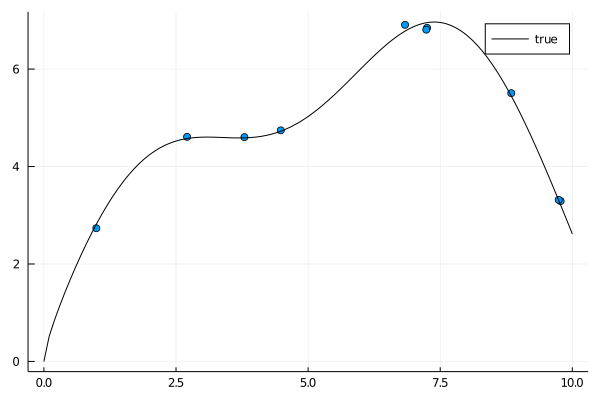

In [8]:
# Working with Koopman operators and GPs

# Consider first a 1-dimensional function: 
f(x) = x + sin(x) + sqrt(x) - 0.01x^3 #+ 0.5*x^(3/2)
# f(x) = atan(x) - 0.01x^3

N = 10 
scale = 10
range = [-50, 50]
noise =  
using Distributions
y(x) = f(x) + rand(Normal(0, 0.1))

x = rand(N)
dataset = vcat([[x y(x)] for x in scale*rand(N)]...)

using Plots

plt = scatter(dataset[:,1], dataset[:, 2], label="")
x_true = 0:0.1:scale
plot!(x_true, f.(x_true), color=:black, label="true")

PosDefException(2)


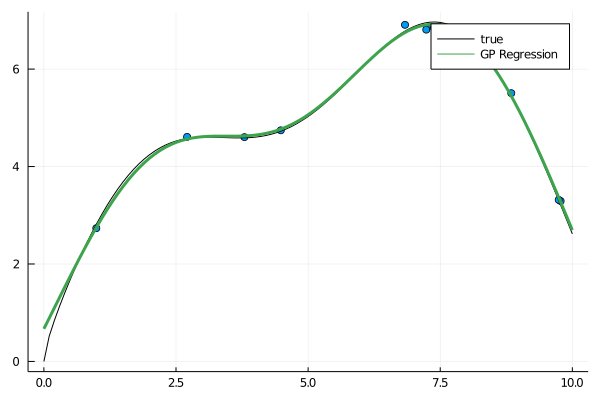

In [9]:
### Create GP Regression
using GaussianProcesses

gps_time = @elapsed begin
    gp = GP(dataset[:,1], dataset[:,2], MeanZero(), SE(0., 0.))
    optimize!(gp)
end

mp, _ = predict_f(gp, x_true)
plot!(x_true, mp, label="GP Regression", width=3)

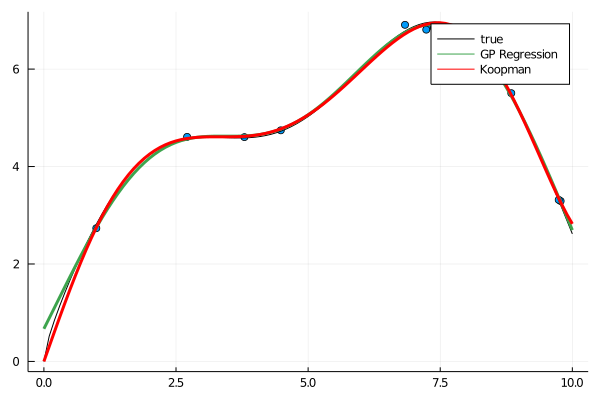

In [10]:
### Create Koopman Approximation
using LinearAlgebra
koopman_time = @elapsed begin
    z(x) = [x x^2 x^3 x^4 x^5 x^6]
    num_obs = length(z(1)) 
    A = zeros(num_obs, num_obs)
    G = zeros(num_obs, num_obs)
    for i=1:N
        global A, G
        A += z(dataset[i, 2])'*z(dataset[i,1])
        G += z(dataset[i, 1])'*z(dataset[i,1])
    end
    koopman_op = A*inv(G)
end

z_true = z.(x_true)
z_prop = vcat([koopman_op[1,:]'*z_true[i]' for i=1:length(x_true)]...)
plot!(x_true, z_prop[:,1], width=3, color=:red, label="Koopman")